# IMPORTS

In [1]:
import torch, torchvision
import pandas as pd
import numpy as np
from PIL import Image


## Load data

In [2]:
dataset = pd.read_csv("Downloads/table.csv")
dataset.head()

,ndc11,rxcui,name,rxnavImageObjectId,rxnavImageFileName,nlmImageFileName,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,00093-0311-01,978006,Loperamide Hydrochloride 2 MG Oral Capsule,185643662,00093-0311-01_RXNAVIMAGE10_26211358.jpg,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,00093-3165-01,197985,Minocycline 50 MG Oral Capsule,185646490,00093-3165-01_RXNAVIMAGE10_36231B28.jpg,00093-3165-01_NLMIMAGE10_19270CA8.jpg,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,00093-0810-01,198045,Nortriptyline 10 MG Oral Capsule,185646437,00093-0810-01_RXNAVIMAGE10_24231228.jpg,00093-0810-01_NLMIMAGE10_34271A58.jpg,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,00093-0811-01,317136,Nortriptyline 25 MG Oral Capsule,185646420,00093-0811-01_RXNAVIMAGE10_20231018.jpg,00093-0811-01_NLMIMAGE10_15270A98.jpg,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,00093-0812-01,198046,Nortriptyline 50 MG Oral Capsule,185646464,00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...


In [3]:
model = torchvision.models.vgg16(pretrained= True)
# model.layer1 = torch.nn.Sequential()
# model.layer2 = torch.nn.Sequential()
# model.layer3 = torch.nn.Sequential()
# model.layer4 = torch.nn.Sequential()
# # model.avgpool = torch.nn.Sequential()
model.classifier = torch.nn.Sequential()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

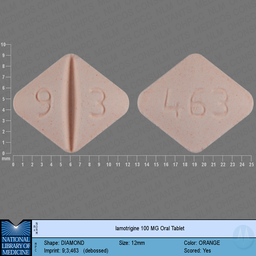

1024 896


In [5]:
img = Image.open(r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\original\00093-0463-01_RXNAVIMAGE10_5429AA3D.jpg")

width, height = img.size

img_cropped = img.resize((256,256), Image.ANTIALIAS)

display(img_cropped)
print(width, height)

# Other temp

In [4]:
from torchvision import transforms
img_trans = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.CenterCrop(100),
#                                 transforms.ToTensor(),
                               ])
img_trans


Compose(
    Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(100, 100))
)

In [ ]:
#Cropped images are stored into new directory 

import os
def main(): 
    # path of the folder containing the raw images 
    inPath =r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\original"
  
    # path of the folder that will contain the modified image 
    outPath =r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image  
        inputPath = os.path.join(inPath, imagePath) 
                  
        # inputPath contains the full directory name 
        im = Image.open(inputPath)
        width, height = im.size
        img_cropped = im.crop((70,0,width,height -170))
        img_cropped = img_trans(img_cropped)
        


        fullOutPath = os.path.join(outPath, imagePath)
        img_cropped.save(fullOutPath)

 
  
        print(fullOutPath)

if __name__ == '__main__': 
    main()    


In [7]:
img_to_tensor = transforms.ToTensor() 

In [8]:
batches = []

import glob

root_dir = r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = img_to_tensor(im)
    batches.append(imResize)



C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3228-30_RXNAVIMAGE10_391E1C80.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3229-30_RXNAVIMAGE10_3E1E1F50.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3235-60_RXNAVIMAGE10_1B158D9C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3238-30_RXNAVIMAGE10_361E1B30.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3239-30_RXNAVIMAGE10_3F1E1F80.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3240-30_RXNAVIMAGE10_A91354BA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3250-30_RXNAVIMAGE10_431E21C1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3251-30_RXNAVIMAGE10_451E2281.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3165-01_NLMIMAGE10_36231B28.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3165-01_RXNAVIMAGE10_19270CA8.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3165-01_RXNAVIMAGE10_36231B28.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3167-53_RXNAVIMAGE10_10270828.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3167-53_RXNAVIMAGE10_F7267B83.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3171-01_RXNAVIMAGE10_10268814.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3171-01_RXNAVIMAGE10_E626F327.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-3193-01_RXNAVIMAGE10_AD29569A.jpg
C:\Users\mistr\Downloads\image-202

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7438-01_RXNAVIMAGE10_84304232.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7442-56_RXNAVIMAGE10_30271848.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7443-56_RXNAVIMAGE10_052702B8.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7465-98_RXNAVIMAGE10_1C380E40.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7477-01_RXNAVIMAGE10_9B294DCA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7542-06_RXNAVIMAGE10_4638A355.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7543-56_RXNAVIMAGE10_4B38A5C5.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7544-56_RXNAVIMAGE10_4738A385.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00185-5254-01_RXNAVIMAGE10_AD1FD6DE.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00185-5400-01_RXNAVIMAGE10_EC20F677.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00186-0162-54_RXNAVIMAGE10_E912F487.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00186-0520-60_RXNAVIMAGE10_C41DE20F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00186-5020-31_RXNAVIMAGE10_C71B63CB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00186-5040-31_RXNAVIMAGE10_FD1D7EDB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00187-0799-42_RXNAVIMAGE10_E639737B.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00187-0844-01_RXNAVIMAGE10_AF1C5782.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0588-01_RXNAVIMAGE10_77303BA1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0589-01_RXNAVIMAGE10_172F8B9C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0590-01_RXNAVIMAGE10_0E2F871C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0633-02_RXNAVIMAGE10_72303931.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0634-02_RXNAVIMAGE10_670533F9.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0635-09_RXNAVIMAGE10_92304922.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0658-02_RXNAVIMAGE10_FA41FD3F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0787-02_RXNAVIMAGE10_B241D93E.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5440-50_RXNAVIMAGE10_B834DC76.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5535-50_RXNAVIMAGE10_331599CC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5571-01_RXNAVIMAGE10_E0127053.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5694-01_RXNAVIMAGE10_F90E7C93.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5695-50_RXNAVIMAGE10_CA3BE55F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5708-01_RXNAVIMAGE10_A234D106.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5786-01_RXNAVIMAGE10_213490B4.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00591-5788-01_RXNAVIMAGE10_C51FE2DF.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13310-0153-07_RXNAVIMAGE10_E70E7393.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13668-0010-01_RXNAVIMAGE10_97344B82.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13668-0038-60_RXNAVIMAGE10_C704E387.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13668-0040-60_RXNAVIMAGE10_9433CA5E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13668-0190-30_RXNAVIMAGE10_A751D39E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13811-0648-10_RXNAVIMAGE10_6F4537B9.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13811-0662-60_RXNAVIMAGE10_234F91BC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\16110-0075-01_RXNAVIMAGE10_D21FE93F.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0407-01_RXNAVIMAGE10_16090B48.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0455-11_RXNAVIMAGE10_D80E6C13.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0501-01_RXNAVIMAGE10_EB3975BB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0545-01_RXNAVIMAGE10_EE23776B.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0724-01_RXNAVIMAGE10_2E3B1748.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0726-01_RXNAVIMAGE10_38349C24.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0727-03_RXNAVIMAGE10_A339D1FE.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\49884-0735-11_RXNAVIMAGE10_0D3306F8.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53014-0404-10_RXNAVIMAGE10_2D1C9684.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0118-02_RXNAVIMAGE10_FA34FD77.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0119-02_RXNAVIMAGE10_333499B4.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0146-01_RXNAVIMAGE10_8021C06E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0469-01_RXNAVIMAGE10_E92374FB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0648-01_RXNAVIMAGE10_D31DE9BF.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53489-0700-07_RXNAVIMAGE10_734739D9.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\53746-0077-01_RXNAVIMAGE10_6605B34D.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\59762-8398-01_RXNAVIMAGE10_E71273E3.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60258-0162-01_RXNAVIMAGE10_910EC886.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60258-0186-01_RXNAVIMAGE10_4B15A5CD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0014-06_RXNAVIMAGE10_633831B1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0015-06_RXNAVIMAGE10_75383AB1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0016-06_RXNAVIMAGE10_7A383D51.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0033-07_RXNAVIMAGE10_983C4C42.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0039-01_RXNAVIMAGE10_14458A6C.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0502-30_NLMIMAGE10_8641C37E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0502-30_RXNAVIMAGE10_8641C37E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0504-30_NLMIMAGE10_8841C43E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0504-30_RXNAVIMAGE10_8841C43E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0506-30_NLMIMAGE10_8941C4CE.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0506-30_RXNAVIMAGE10_8941C4CE.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0508-30_NLMIMAGE10_8941C4FE.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63459-0508-30_RXNAVIMAGE10_8941C4FE.jpg
C:\Users\mistr\Downloads\image-20201010T

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68682-0372-90_RXNAVIMAGE10_62443161.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68682-0409-10_RXNAVIMAGE10_6D39B6CD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68682-0521-01_RXNAVIMAGE10_5E442F21.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\69097-0421-07_RXNAVIMAGE10_954D4ABA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\69097-0813-12_RXNAVIMAGE10_384F9C0C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\69097-0814-12_RXNAVIMAGE10_334F99FC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\76282-0377-02_RXNAVIMAGE10_874D43FA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\76439-0101-50_RXNAVIMAGE10_6939B48D.jpg
C:\Users\mistr\Downloads\image-2

In [9]:
batch = torch.stack(batches)
batch.shape
# img = batch[0].unsqueeze(0)
# print(img.shape)
start_index = 0
end_index = len(batch)
batch_main = batch[start_index:end_index] 

In [17]:
output = model(batch_main)

In [18]:
output.shape

torch.Size([1153, 25088])

output = model(batch)
output.shape

feats2 = output[0]
feats2
torch.save(feats2, "train.pt")


In [16]:



for i in range(0,len(output)):
    torch.save(output[i], "feats" + str(i+start_index)+ ".pt")
    

NameError: name 'output' is not defined

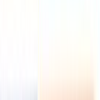

In [32]:
test_img = Image.open("31ViTb2Wg+L.jpg").convert('RGB')
width, height = test_img.size
img_cropped1 = test_img.crop((70,0,width,height -170))
#display(img_cropped1)
img_cropped1.size
test_img1 = img_trans(img_cropped1)
display(test_img1)
test_img1 = img_to_tensor(test_img1)


In [33]:
output_batch = torch.stack([test_img1])
output_batch[0].shape

output_img = output_batch[0].unsqueeze(0)
output_img.shape

torch.Size([1, 3, 100, 100])

In [34]:
test_output = model(output_img)
test_sim = test_output[0]

feats4 = torch.load("feats1152.pt")

result1 = torch.nn.functional.cosine_similarity(feats4, test_sim, dim=0)

print(result1)
result1.item()

In [35]:

resultmain = []
maxi= float(0) 
for i in range (0, 1153):
    feat_model = torch.load(path+"\\feats" + str(i) + ".pt") 
   

    result = torch.nn.functional.cosine_similarity(feat_model, test_sim, dim=0)
#     print (result.item())
    if(result.item() >= maxi):
        t  = feat_model
        maxi = result.item()
        print(maxi)
        resultmain.append(i)
resultmain
     
    

0.23448453843593597
0.27651554346084595
0.3554759621620178
0.3930487036705017
0.39427047967910767
0.47455859184265137
0.5440642237663269
0.6083537340164185
0.6769397258758545


[0, 2, 5, 41, 54, 71, 296, 616, 822]

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3228-30_RXNAVIMAGE10_391E1C80.jpg


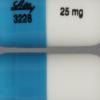

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3235-60_RXNAVIMAGE10_1B158D9C.jpg


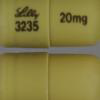

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3240-30_RXNAVIMAGE10_A91354BA.jpg


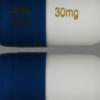

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00045-0650-60_RXNAVIMAGE10_EC127653.jpg


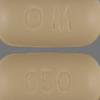

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00069-4200-30_RXNAVIMAGE10_601DB05D.jpg


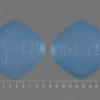

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00074-3020-11_RXNAVIMAGE10_E01D703B.jpg


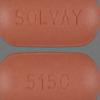

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00172-5361-60_RXNAVIMAGE10_CA23650B.jpg


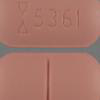

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\16252-0516-05_RXNAVIMAGE10_D61FEB7F.jpg


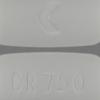

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0172-90_RXNAVIMAGE10_FD07FE9F.jpg


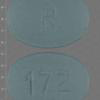

IndexError: list index out of range

In [36]:
import glob

root_dir = r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"

k = 0;
l = 0;

for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    
    if(k==resultmain[l]):
        print(filename)
        im = Image.open(filename)
        display(im)
        if(l > len(resultmain)):
            break;
        l += 1
    k += 1
